# PISA Data Exploration 
## by Marawan Abdelrahman

## Preliminary Wrangling

> This Dataset contains a survey of students' skills at the end of compulasory(obligatory) education in different countries and describes how well are the student beyond this education.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

> I uploaded the whole dataset on compter to start my exploration

In [2]:
#I read the dataset here and print the first 10 columns to check
df = pd.read_csv('pisa2012.csv', encoding="ANSI")  # If ansi didn't work replace it with Windows-1250
df.head()

C:\Users\Maraw\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [3]:
df.drop("Unnamed: 0", axis = 1,inplace =True) #Dropped unnamed column

> Starting from here I started to explore the unique values of some columns that got my eye from dataset description

In [4]:
df.GRADE.describe()

count    484617.000000
mean         -0.162964
std           0.655558
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: GRADE, dtype: float64

In [5]:
df.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [6]:
print(df.shape) # printing the shape of the dataset
df.info() # gain some insights of data 


(485490, 635)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


In [7]:
df.columns[df.isnull().any()].shape[0] # Check the null values 

511

In [8]:
df.ST04Q01.unique() #GENDER

array(['Female', 'Male'], dtype=object)

In [9]:
df.ST09Q01.unique() #no.of times that the student Skip whole school day 

array(['None  ', nan, 'One or two times  ', 'Three or four times  ',
       'Five or more times  '], dtype=object)

In [10]:
df.ST08Q01.unique() #no.of times that the student

array(['None  ', 'One or two times  ', 'Three or four times  ', nan,
       'Five or more times  '], dtype=object)

In [11]:
df.ST115Q01.unique() #no.of times that the student skip classes within school day

array([ 1.,  2.,  3., nan,  4.])

In [12]:
df.ST11Q01.unique() #Mother at home

array(['Yes', nan, 'No'], dtype=object)

In [13]:
df.ST15Q01.unique() #Mother's JOB

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

In [14]:
df.ST26Q06.unique() #Internet Availability

array(['No', 'Yes', nan], dtype=object)

In [15]:
df.ST29Q01.unique() #Enjoy Reading

array(['Agree', 'Disagree', nan, 'Strongly agree', 'Strongly disagree'],
      dtype=object)

In [16]:
df.ST42Q02.unique() #Not Good at Maths

array(['Disagree', nan, 'Strongly agree', 'Agree', 'Strongly disagree'],
      dtype=object)

In [17]:
df.ST42Q04.unique() #Get Good <Grades>

array(['Agree', nan, 'Strongly agree', 'Disagree', 'Strongly disagree'],
      dtype=object)

In [18]:
df.ST77Q02.unique() #needs Extra help

array(['Every Lesson', nan, 'Most Lessons', 'Some Lessons',
       'Never or Hardly Ever'], dtype=object)

In [19]:
df.ST77Q04.unique() #Teacher helps

array(['Every Lesson', nan, 'Some Lessons', 'Most Lessons',
       'Never or Hardly Ever'], dtype=object)

In [20]:
df.ST02Q01.describe() #National Study Programme

count    485438.000000
mean          2.579260
std           2.694013
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: ST02Q01, dtype: float64

In [21]:
df.ST05Q01.unique() #Attend <ISCED 0>

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [22]:
df.ST18Q03.unique() #Father Qualifications - <ISCED level 5B>

array([nan, 'No', 'Yes'], dtype=object)

In [23]:
df.REPEAT.unique() #repeat a grade

array(['Did not repeat a <grade>', nan, 'Repeated a <grade>'],
      dtype=object)

In [24]:
#Here I selected the coulmns I may use in the analysis
columns_used = ["CNT","AGE","ST01Q01","ST04Q01","ST08Q01","ST09Q01",
                 "ST115Q01","ST11Q01","ST11Q02","ST13Q01","ST17Q01",
                 "ST15Q01","ST19Q01","ST26Q06","ST29Q01","ST29Q03","ST29Q04",
                 "ST42Q02","ST42Q04","ST42Q06","ST49Q07","ST49Q05","ST57Q01",
                 "ST57Q02","ST57Q03","ST57Q04","ST57Q05","ST57Q06","ST77Q01",
                 "ST77Q02","ST77Q04","IC22Q06","GRADE","REPEAT","PV1MATH",
                 "PV2MATH","PV3MATH","PV4MATH","PV5MATH","PV1READ","PV2READ",
                 "PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE",
                 "PV3SCIE","PV4SCIE","PV5SCIE","ST88Q01","ST88Q02","ST88Q03","ST88Q04","SMINS","MMINS"]
df2= df[columns_used] #Creating the second dataframe


In [25]:
#renaming the columns to more simpler names
columns_used2 = ["CNT","AGE","INT_GRADE","GENDER","LATE_FOR_SCHOOL","SKIP_SCHOOL",
                 "NU_CLASSES_SKIPPED_IN_DAY","MOTHER","FATHER","MOTHER_HIGHEST_SCHOOLING","FATHER_HIGHEST_SCHOOLING",
                 "MOTHER_JOB","FATHER_JOB","Internet","ENJOY_READ_MATH","LOOK_FORWARD_T0_MATH_LESSONS","ENJOY_MATH",
                 "NOT_GOOD_AT_MATH","GET_GOOD_GRADES_MATH","QUICK_LEARNER","PROGRAMMING_COMPUTER","STUDY_MATH_MORE_THAN_2H","ST_HW",
                 "ST_GH","ST_PT","ST_CC","ST_WP","ST_C","MTEACHER_SHOW_INTEREST",
                 "MTEACHER_EXTRA_HELP","MTEACHER_HELP","TROUBLESOME","GRADE","REPEAT","PV1MATH",
                 "PV2MATH","PV3MATH","PV4MATH","PV5MATH","PV1READ","PV2READ",
                 "PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE",
                 "PV3SCIE","PV4SCIE","PV5SCIE","SCHOOL_DOES_LITTLE_TO_PREPARE_FL","SCHOOL_WASTE_OF_TIME","SCHOOL_GAE_ME_CONF","SCHOOL_USEFUL_FOR_JOB","SMINS","MMINS"]
new = dict(zip(columns_used,columns_used2))
df2.rename(columns=new,inplace = True)
df2.head()

C:\Users\Maraw\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CNT,AGE,INT_GRADE,GENDER,LATE_FOR_SCHOOL,SKIP_SCHOOL,NU_CLASSES_SKIPPED_IN_DAY,MOTHER,FATHER,MOTHER_HIGHEST_SCHOOLING,...,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,SCHOOL_DOES_LITTLE_TO_PREPARE_FL,SCHOOL_WASTE_OF_TIME,SCHOOL_GAE_ME_CONF,SCHOOL_USEFUL_FOR_JOB,SMINS,MMINS
0,Albania,16.17,10,Female,None,None,1.0,Yes,Yes,<ISCED level 3A>,...,408.8400,348.2283,367.8105,392.9877,Agree,Strongly agree,Strongly disagree,Strongly disagree,NaN,NaN
1,Albania,16.17,10,Female,One or two times,None,1.0,Yes,Yes,<ISCED level 3A>,...,471.5964,471.5964,443.6218,454.8116,NaN,NaN,NaN,NaN,90.0,270.0
2,Albania,15.58,9,Female,None,None,1.0,Yes,Yes,"<ISCED level 3B, 3C>",...,428.7952,492.2044,512.7191,499.6643,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,15.67,9,Female,None,None,1.0,Yes,Yes,"<ISCED level 3B, 3C>",...,481.5740,448.9370,474.1141,426.5573,NaN,NaN,NaN,NaN,90.0,135.0
4,Albania,15.50,9,Female,One or two times,None,2.0,Yes,Yes,She did not complete <ISCED level 1>,...,275.7740,372.7527,403.5248,422.1746,Disagree,Strongly disagree,Strongly agree,Strongly agree,NaN,NaN


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CNT                               485490 non-null  object 
 1   AGE                               485374 non-null  float64
 2   INT_GRADE                         485490 non-null  int64  
 3   GENDER                            485490 non-null  object 
 4   LATE_FOR_SCHOOL                   479143 non-null  object 
 5   SKIP_SCHOOL                       479131 non-null  object 
 6   NU_CLASSES_SKIPPED_IN_DAY         479269 non-null  float64
 7   MOTHER                            460559 non-null  object 
 8   FATHER                            441036 non-null  object 
 9   MOTHER_HIGHEST_SCHOOLING          457979 non-null  object 
 10  FATHER_HIGHEST_SCHOOLING          443261 non-null  object 
 11  MOTHER_JOB                        467751 non-null  o

> Most of this columns contains NAN. So, Instead of cleaning the dataset as whole and losing half of the data I will drop the NAN to the columns I am goning to visualize.

In [27]:
df2.columns[df2.isnull().any()] #Identifing the columns with null values

Index(['AGE', 'LATE_FOR_SCHOOL', 'SKIP_SCHOOL', 'NU_CLASSES_SKIPPED_IN_DAY',
       'MOTHER', 'FATHER', 'MOTHER_HIGHEST_SCHOOLING',
       'FATHER_HIGHEST_SCHOOLING', 'MOTHER_JOB', 'FATHER_JOB', 'Internet',
       'ENJOY_READ_MATH', 'LOOK_FORWARD_T0_MATH_LESSONS', 'ENJOY_MATH',
       'NOT_GOOD_AT_MATH', 'GET_GOOD_GRADES_MATH', 'QUICK_LEARNER',
       'PROGRAMMING_COMPUTER', 'STUDY_MATH_MORE_THAN_2H', 'ST_HW', 'ST_GH',
       'ST_PT', 'ST_CC', 'ST_WP', 'ST_C', 'MTEACHER_SHOW_INTEREST',
       'MTEACHER_EXTRA_HELP', 'MTEACHER_HELP', 'TROUBLESOME', 'GRADE',
       'REPEAT', 'SCHOOL_DOES_LITTLE_TO_PREPARE_FL', 'SCHOOL_WASTE_OF_TIME',
       'SCHOOL_GAE_ME_CONF', 'SCHOOL_USEFUL_FOR_JOB', 'SMINS', 'MMINS'],
      dtype='object')

In [28]:
df2.dropna(subset = ["AGE", "GENDER"],inplace = True) #Drop NAN values in age and gender columns is almost essential

C:\Users\Maraw\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df2["INT_GRADE"].unique() #The grades of students

array([10,  9,  8, 11,  7, 12, 96, 13], dtype=int64)

In [30]:
df2 = df2.query("INT_GRADE != 96") # Removing a very stange grade

> 96 grade is very stange. After searching I couldn't find any trace of this grade so I decided to remove it from the dataset.

## What is the structure of your dataset?

&nbsp; This dataset is very large which is consists of:<br>
<ul>
<li>635 column</li>
<li>485490 row</li>
</ul>
Most of this columns contains null values.<br>
<br>
Number of columns with specific data type: <br>
<ul>
    <li>float   : 250</li>
    <li>integer : 17</li>
    <li>String  : 368</li>
</ul>
Most of Data are ordinal or Discret<br>

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest are (students' grades compared to others in same country and MATHS,SCIENCE, READING scores).
I want to know the features that may effect them ( increase, decrease or no effect) and use them to conclude other features. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In this analysis I am 55 features that may have effect on the main features, Using this I can make comparison in spacific features to others Ex.(Compare Math grade between country)(The affect of mother absence at home vs  the grade,behaviour and both ). This Examples are only few to what we are going to make. I will list all the features here:
  CNT                              
  AGE                             
  INT_GRADE                       
  GENDER                          
  LATE_FOR_SCHOOL                 
  SKIP_SCHOOL                     
  NU_CLASSES_SKIPPED_IN_DAY       
  MOTHER                          
  FATHER                          
  MOTHER_HIGHEST_SCHOOLING        
  FATHER_HIGHEST_SCHOOLING        
  MOTHER_JOB                      
  FATHER_JOB                      
  Internet                        
  ENJOY_READ_MATH                 
  LOOK_FORWARD_T0_MATH_LESSONS    
  ENJOY_MATH                      
  NOT_GOOD_AT_MATH                
  GET_GOOD_GRADES_MATH            
  QUICK_LEARNER                   
  PROGRAMMING_COMPUTER            
  STUDY_MATH_MORE_THAN_2H         
  ST_HW                           
  ST_GH                           
  ST_PT                           
  ST_CC                           
  ST_WP                           
  ST_C                            
  MTEACHER_SHOW_INTEREST          
  MTEACHER_EXTRA_HELP             
  MTEACHER_HELP                   
  TROUBLESOME                     
  GRADE                           
  REPEAT                          
  PV1MATH                         
  PV2MATH                         
  PV3MATH                         
  PV4MATH                         
  PV5MATH                         
  PV1READ                         
  PV2READ                         
  PV3READ                         
  PV4READ                         
  PV5READ                         
  PV1SCIE                         
  PV2SCIE                         
  PV3SCIE                         
  PV4SCIE                         
  PV5SCIE                         
  SCHOOL_DOES_LITTLE_TO_PREPARE_FL
  SCHOOL_WASTE_OF_TIME            
  SCHOOL_GAE_ME_CONF              
  SCHOOL_USEFUL_FOR_JOB           
  SMINS                           
  MMINS                           


## Univariate Exploration


> Here I will look and check on some variables in the dataset

Text(0, 0.5, 'frequency')

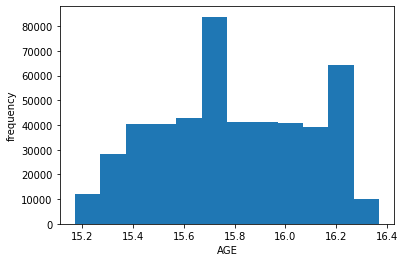

In [31]:
# Creating A histogram of Age range of the dataset
binss = np.arange(df2["AGE"].min(),df2["AGE"].max()+0.1,0.1)
plt.hist(df2["AGE"],bins= binss)
plt.xlabel("AGE")
plt.ylabel("frequency")

The Students' age ranges from 15 to 16 and 4 months, With 2 spikes around 15.7 and 16.2

Text(0, 0.5, 'Ratio')

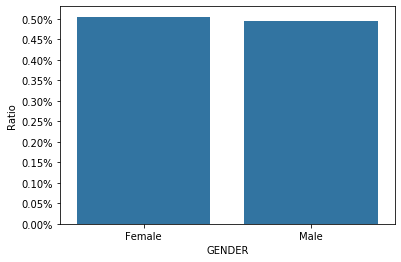

In [32]:
# A barplot of the ratio between male and female
df2gen = df2["GENDER"].dropna()
maxii = df2gen.value_counts().max()
col_sizee= df2gen.shape[0]
max_propp = maxii / col_sizee
basic_color = sb.color_palette()[0]

tick_propss = np.arange(0, max_propp, 0.05)
tick_namess = ['{:0.2f}%'.format(x) for x in tick_propss]

sb.countplot(df2["GENDER"],color= basic_color)
plt.yticks(tick_propss * col_sizee, tick_namess)

plt.ylabel("Ratio")

The ratio between male and female is almost identical but female is slightly higher.

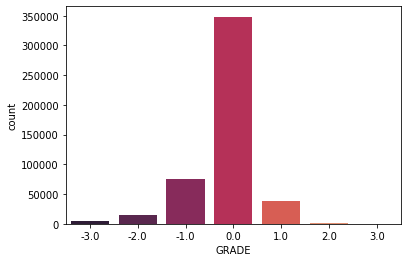

In [33]:
sb.countplot(df2["GRADE"], palette="rocket")

In this graph, Grade compared to modal grade in country( 0 is average,-3 very poor,3 Perfect). As shown this graph is likely to be Bell-shaped,Which is similar to whar I expected.Most of students are in average level.

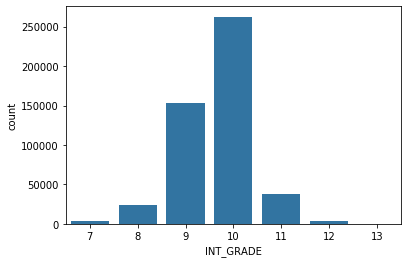

In [34]:
sb.countplot(df2["INT_GRADE"], color=basic_color)

Most of students who conducted the survery are in grade 10 and this plot is a bell-shaped too.

Text(0, 0.5, 'proportion')

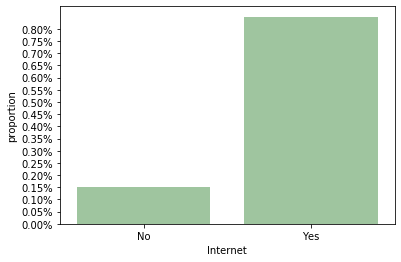

In [35]:
# Ratio between students have internet or not
df2int = df2["Internet"].dropna()
maxi = df2int.value_counts().max()
col_size= df2int.shape[0]
max_prop = maxi / col_size

tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}%'.format(x) for x in tick_props]

sb.countplot(df2int,color="green",alpha=0.4)
plt.yticks(tick_props * col_size, tick_names)
plt.ylabel('proportion')



In [36]:
df2["SMINS"].describe() #describe the range of columns

count    270639.000000
mean        211.100935
std         131.317519
min           0.000000
25%         120.000000
50%         180.000000
75%         270.000000
max        2975.000000
Name: SMINS, dtype: float64

In [37]:
df2["MMINS"].describe() #describe the range of columns

count    282835.000000
mean        226.005912
std          97.427758
min           0.000000
25%         180.000000
50%         220.000000
75%         250.000000
max        3000.000000
Name: MMINS, dtype: float64

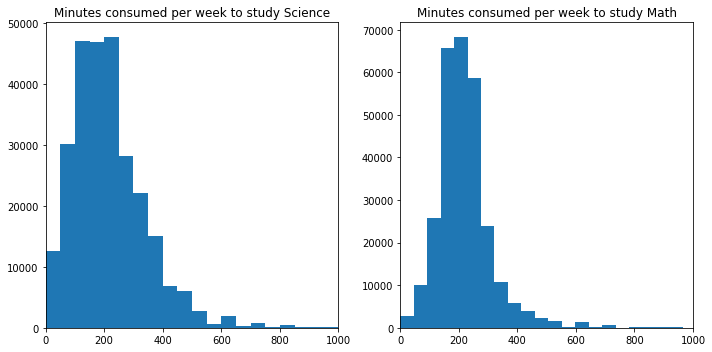

In [38]:
# Two subplots on the right is minutes consumed weekly for learning math and on the left for science
dfsm = df2[["SMINS","MMINS"]]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
bins_smin = np.arange(0, dfsm["SMINS"].max()+50,50 )
plt.hist(dfsm["SMINS"], bins = bins_smin)
plt.xlim((0,1000))
plt.title("Minutes consumed per week to study Science")

plt.subplot(1,2,2)
bins_mmin = np.arange(0, dfsm["MMINS"].max()+46,46 )
plt.hist(dfsm["MMINS"], bins = bins_mmin)
plt.xlim((0,1000))
plt.title("Minutes consumed per week to study Math")

plt.tight_layout()

This two plot are right-skewed and The average minutes consumed for studying science and math weekly are somewhat similar between 100 and 300 minutes per week but here some students study science in less minutes than math.

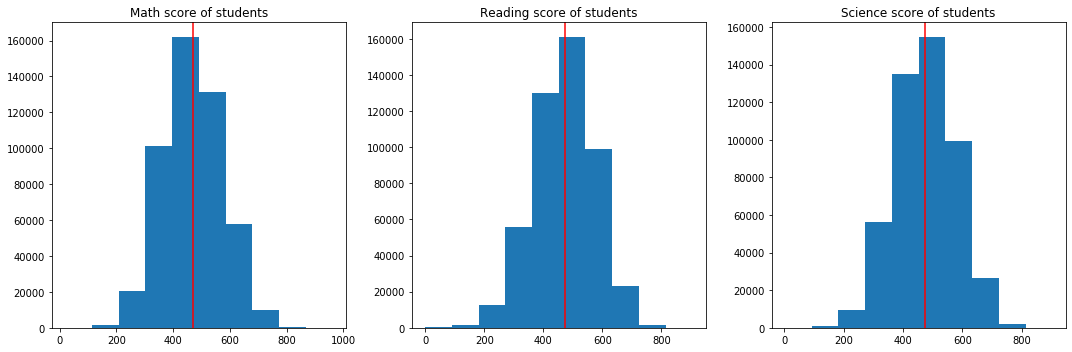

In [39]:
# The distribution of math, science and reading scores
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(df2["PV1MATH"])
plt.title("Math score of students")
plt.axvline(x=df2["PV1MATH"].mean(), color="red")
# math score distribution
plt.subplot(1,3,2)
plt.hist(df2["PV1READ"])
plt.title("Reading score of students")
plt.axvline(x=df2["PV1READ"].mean(), color="red")

# reading score distribution
plt.subplot(1,3,3)
plt.hist(df2["PV1SCIE"])
plt.title("Science score of students")
plt.axvline(x=df2["PV1SCIE"].mean(), color="red")
# science score distribution
plt.tight_layout()

Here I draw the score of students in the dataset, They all have bell-shaped. The score's mean of this subjects are somewhat similar they all range between 400 and 500. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The scores of student in dataset in all subjects are all symmetrical which was expected also the grade of students compared to others in the same country is more concentrated in level 0 (the averagre grade) I was expecting to get more students in level 1 2 , 3.I didn't need to use transformation to this variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> On other features during my analysis on students grade I found two strange grade which is 13 and 96!!. I needed to perform some searches on them. I found out that there is grade 13 in some countries but I didn't know what is grade 96. It may needs more analysis but I removed it from the dataset because I didn't found insights about this.
I didn't change the values of other features.

## Bivariate Exploration


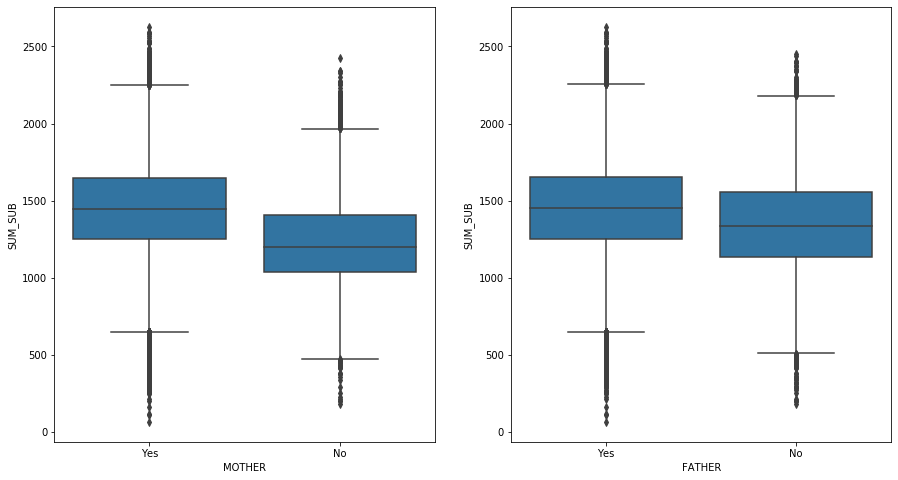

In [40]:
# plotting two subplots with the same y-axis variable 
df2["SUM_SUB"] = df2["PV1MATH"] + df2["PV1SCIE"] + df2["PV1READ"] # Sum the scores of three subjects
df3 = df2[["MOTHER","FATHER","SUM_SUB","CNT"]].dropna()
# Mother at home vs total score of subjects
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sb.boxplot(data = df3, x= "MOTHER", y= "SUM_SUB",color = basic_color)
# Father at home vs total score of subjects
plt.subplot(1,2,2)
sb.boxplot(data = df3, x= "FATHER", y= "SUM_SUB",color = basic_color)


In this two plots I wanted to know the effect of not having mother and father at home due to any reason. It seems that average total score in the three subjects of a student(READING,MATH and SCIENCE) that don't have mother is less than the one who have one.The same with Father but It has lower effect than mother. This one show the importance to have parents in home.

In [41]:
#Here I performed the calculation I found in dataset decoumentaion to get the accurate mean from 5 scores of each subject.
df2_gb = df2[["CNT","PV1MATH","PV2MATH","PV3MATH","PV4MATH",
     "PV5MATH","PV1READ","PV2READ","PV3READ","PV4READ",
     "PV5READ","PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE"]].groupby(["CNT"]).mean()
for z in ["MATH","READ","SCIE"]:
    df2_gb[z] = (df2_gb["PV1"+z]+df2_gb["PV2"+z]+df2_gb["PV3"+z]+df2_gb["PV4"+z]+df2_gb["PV5"+z])/5
    

In [42]:
df2_gb.head()

,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,MATH,READ,SCIE
CNT,,,,,,,,,,,,,,,,,,
Albania,395.296185,394.871981,395.468625,394.728282,394.029488,396.424292,397.219617,395.132755,397.135674,395.338889,399.068070,399.386174,398.621977,399.013022,398.493400,394.878912,396.250245,398.916529
Argentina,395.402241,395.900086,395.430588,395.591438,395.854203,403.511227,403.155658,403.514075,403.542035,404.257305,410.369278,409.927403,410.600994,410.651660,410.842687,395.635711,403.596060,410.478404
Australia,492.842855,493.335736,493.353218,493.636585,493.176301,500.845303,501.012221,501.296108,501.186905,500.944116,511.250599,511.427811,512.042515,511.775281,511.694853,493.268939,501.056931,511.638212
Austria,507.711753,507.529917,507.837725,507.763517,508.051011,490.918021,491.921403,491.204811,491.517774,491.865745,507.213082,508.041635,508.020063,508.495425,508.413846,507.778785,491.485551,508.036810
Belgium,522.010566,521.969246,521.489743,521.973837,521.585240,514.779624,514.476708,514.718197,515.096044,514.624183,512.804436,512.375291,512.492251,512.877975,512.526657,521.805726,514.738951,512.615322


Text(0.5, 0, 'READ SCORE')

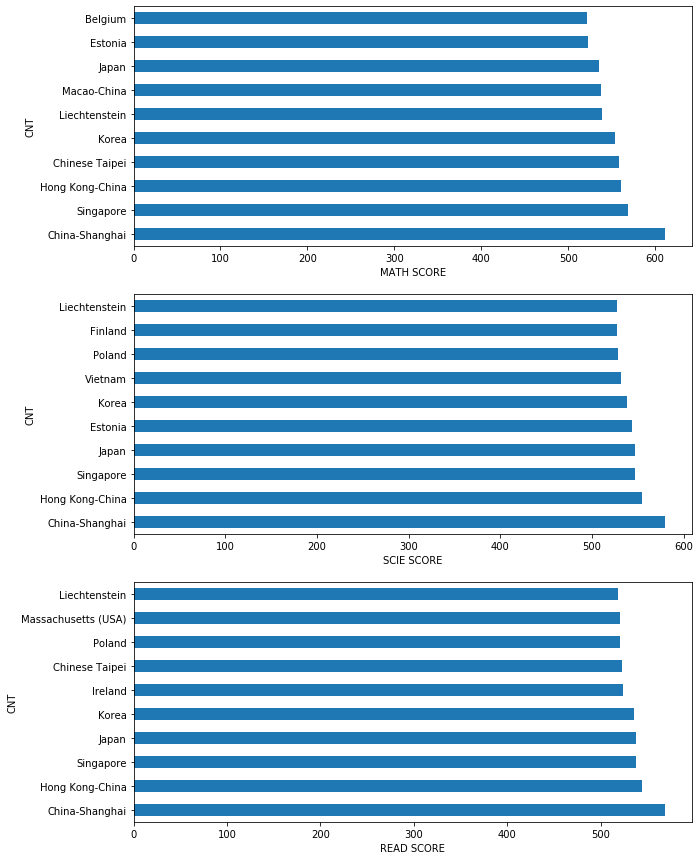

In [43]:
#plotting the top 10 countries in the average score in each subject
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10,15))
# math score vs countries
df2_gb[["MATH"]].sort_values(by="MATH",ascending = False).head(10).plot(kind= "barh",legend = 0,ax=axes[0]).set_xlabel("MATH SCORE")

# Science score vs countries

df2_gb[["SCIE"]].sort_values(by="SCIE",ascending = False).head(10).plot(kind= "barh",legend = 0,ax=axes[1]).set_xlabel("SCIE SCORE")

# Reading score vs countries
df2_gb[["READ"]].sort_values(by="READ",ascending = False).head(10).plot(kind= "barh",legend = 0,ax=axes[2]).set_xlabel("READ SCORE")

I made a bar plot for the average scores of studens in each country then cropped the top 10. It seems that average scores of shinghai's students is the top than stundents of any country this may needs further analysis to know the reason why.The top 4 are almost the same in all subjects except in the math score.

Text(0.5, 0, 'SUM SCORES')

<Figure size 1440x720 with 0 Axes>

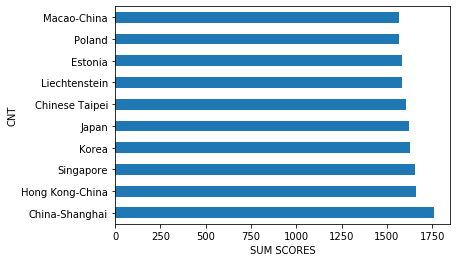

In [44]:
# Average Sum of scores vs countries
plt.figure(figsize=(20,10))
df2_gb["SUM"] = df2_gb["READ"]+df2_gb["MATH"]+df2_gb["SCIE"]
top = df2_gb[["SUM","MATH","READ","SCIE"]].sort_values(by="SUM",ascending = False).head(10)
top[["SUM"]].plot(kind= "barh",legend = 0).set_xlabel("SUM SCORES")

After accumulating the scores of all subjects of each country.The top 3 of Reading and science still are the same here same here. This means that they have solid education plus other factors that may have impact such as traditions, society, etc.

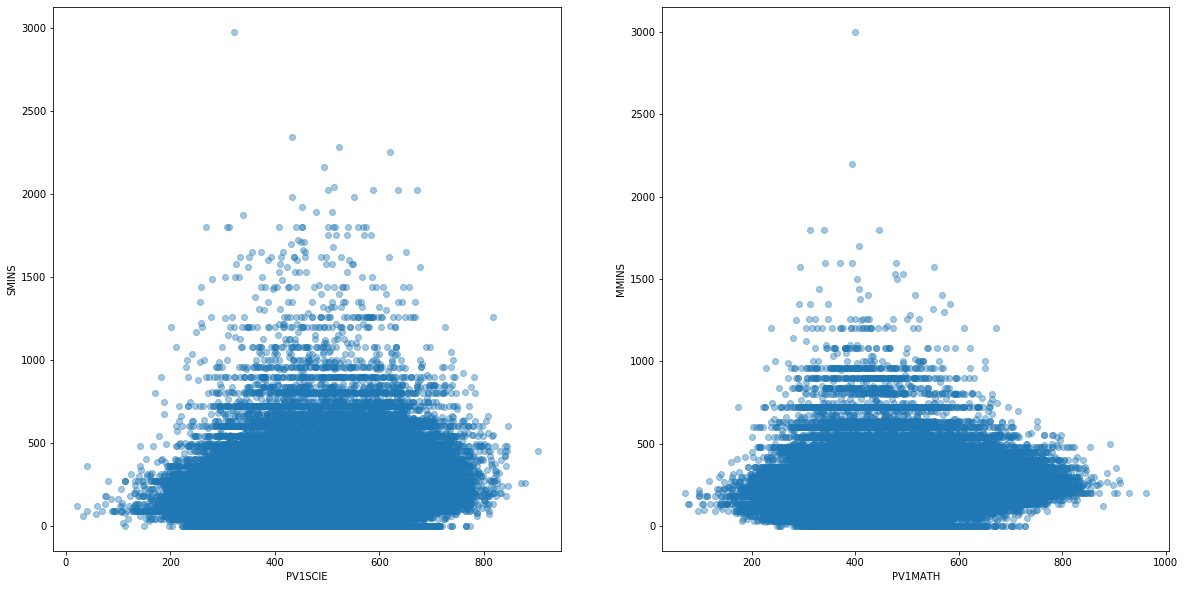

In [45]:
# Comparing science and math scores vs minutes per week that is consumed on learning them.
plt.figure(figsize=(20,10))
dfsm2 = df2[["SMINS","MMINS","PV1SCIE","PV1MATH"]].dropna()

# Science score vs minutes consumed weekly to learn
plt.subplot(1,2,1)
sb.regplot(data = dfsm2, y= "SMINS",x = "PV1SCIE",fit_reg=0,scatter_kws={"alpha":0.4})

# Math score vs minutes consumed weekly to learn
plt.subplot(1,2,2)
sb.regplot(data = dfsm2, y= "MMINS",x = "PV1MATH",fit_reg=0,scatter_kws={"alpha":0.4})

this is a comparison between the learning time (in minutes) per week and the score of each student.<br>
Although there is positive relationship between the two factors but It wasn't strong as expected. This means there are many factors affects score. Still, learning time improves the score and It have effect in both math and science.

In [46]:
# This one order the column from strongly agree to strongly disagree
df2['QUICK_LEARNER']=df2['QUICK_LEARNER'].astype(CategoricalDtype(categories=['Strongly agree','Agree','Disagree','Strongly disagree']))

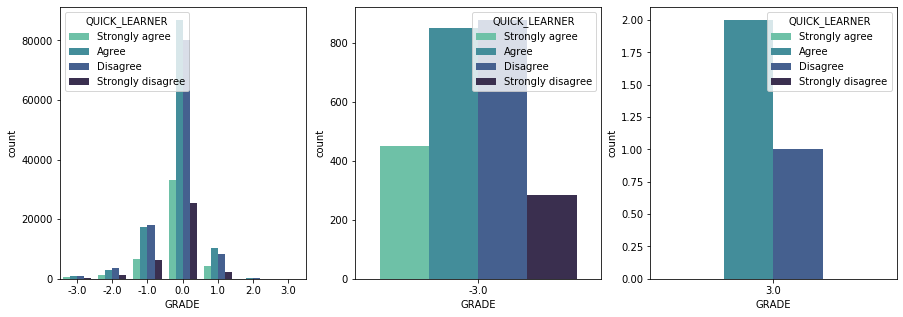

In [47]:
# Creating dataset of desired column
comparison = df2[["GRADE","QUICK_LEARNER","SUM_SUB"]].dropna()
comparison2 = comparison.query("GRADE == -3")
comparison3 = comparison.query("GRADE == 3")

#Grade of student compared to modal grade in country AND their agreement if they are quick learner
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
g = sb.countplot(data = comparison, x = "GRADE",hue = "QUICK_LEARNER",palette="mako_r")

# A deeper look on -3 grade
plt.subplot(1,3,2)
sb.countplot(data = comparison2, x = "GRADE",hue = "QUICK_LEARNER",palette="mako_r")

# Another deep look on 3 grade
plt.subplot(1,3,3)
sb.countplot(data = comparison3, x = "GRADE",hue = "QUICK_LEARNER",palette="mako_r")

From this graph we can conclude that most of student who have high grades agree that they are quick leaner but decrease slightly when the grade decreases. Only few students of grade 3 answered this question which didn't gave us good insight about this category of students. The number of students with grade 0 is higher than any grade as we concluded from the previous univariate plot but didn't affects much on the conclusion.

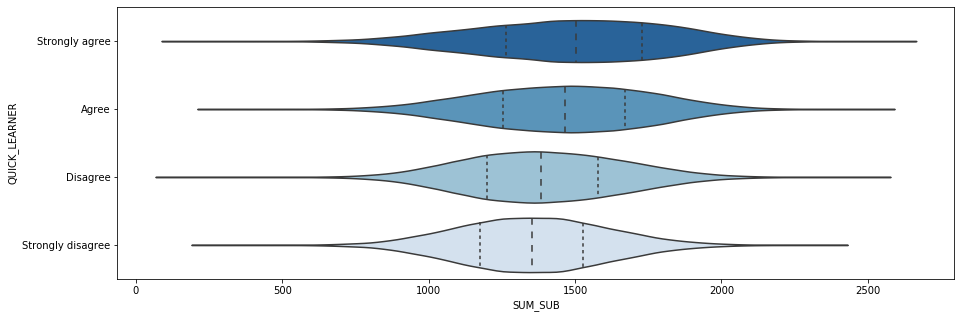

In [48]:


#Grade of student compared to modal grade in country AND their agreement if they are quick learner in violin plot
plt.figure(figsize=(15,5))
sb.violinplot(data = comparison, x = "SUM_SUB",y = "QUICK_LEARNER",palette="Blues_r", inner = "quartile")


In this plot, It shows us that students with higher total score in PISA 2012 are more likely agree and strong;y agree they are quick learners. There is outliers is every catergory but it decreases when the students disagree or strongly disagree.

In [49]:
# Ordering the help of math teacher to each student according to the number of lessons.
df2['MTEACHER_HELP']=df2['MTEACHER_HELP'].astype(CategoricalDtype(categories=['Every Lesson','Most Lessons','Some Lessons','Never or Hardly Ever']))

(0, 1500)

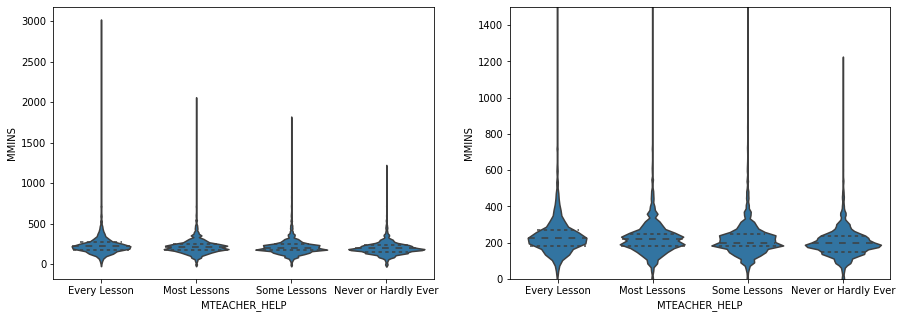

In [50]:
# Creating two dataset for the desired columns

hellp = df2[["MTEACHER_HELP","MMINS","PV1MATH"]].dropna()
hellp2 = df2[["MTEACHER_EXTRA_HELP","MMINS","PV1MATH"]].dropna() 
plt.figure(figsize=(15,5))

# Math teacher help vs Minutes consumed on learning math weekly
plt.subplot(1,2,1)
sb.violinplot(data = hellp, x= "MTEACHER_HELP", y= "MMINS",inner = "quartile", color = basic_color)

# limiting the y axiss to see the median of each category.
plt.subplot(1,2,2)
sb.violinplot(data = hellp, x= "MTEACHER_HELP", y= "MMINS",inner = "quartile", color = basic_color)
plt.ylim((0,1500))

In this plots I wanted to know the relation between the minutes consumed for learning math per week to the need of student for teacher help. In the left plot The outliers are different and very far from the median but they decrease when the need of help decrease, Also after magnifing on the median We can see that there is slight decrease in amount of minutes when the student doesn't need help. This is a little unexpected and I thought the learning time decreases when students needs help.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I concluded the top countries who have high average score in all subjects and each subject. Secondly, I found that there is a negative effect on mother and father absence at home on the total score of student in 3 subjects.Then, There is positive relation between the amount of time consumed on learning science or math and the score on them, but It wasn't strong as expected. Also, The student who have high grades agree that they are quick learner but decrease slightly and disagree increases when the grade decreases. This factor depends on student opinion which may be correct or not but this relation wasn't bad.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yeah I discovered very small negative relationship between the time needed to learn math per week and the need of teacher help in each lesson. The studen't may take less time to learn math if he hardly asks the teacher which is very intersting output and I will continue to analyse it in the multivariate exploration.

## Multivariate Exploration


C:\Users\Maraw\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


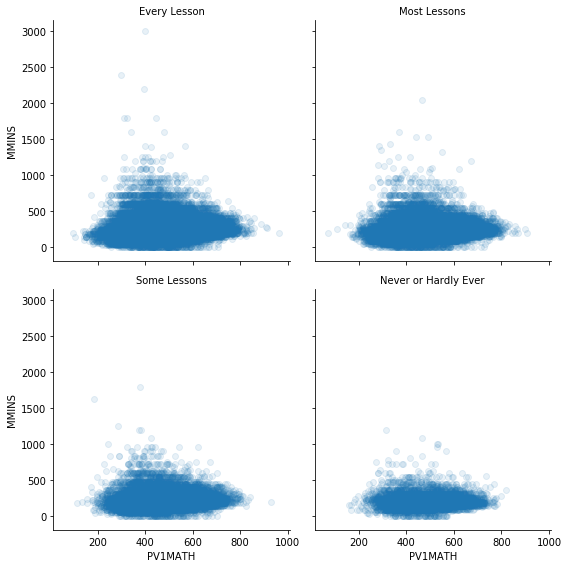

In [51]:
# Math score vs minutes consumed for learning weekly vs the need of teacher help
g = sb.FacetGrid(data= hellp, col = "MTEACHER_HELP",col_wrap=2,size=4)
g.map(sb.regplot,"PV1MATH","MMINS", fit_reg=False,scatter_kws={'alpha':0.1})
g.set_titles(col_template = '{col_name}')
plt.tight_layout()

In this plot, I continoued my analysis from the previous plot in bivarivate. I added math score to the relation and made Facet of 4 scatter plots (math score vs minutes consumed per week). This plots adds more points on the previous conclusion.We can see here that amount of time decreases as the help decrease and the score range shrinks when the student need less help. We can see the outliers decreases too.

C:\Users\Maraw\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


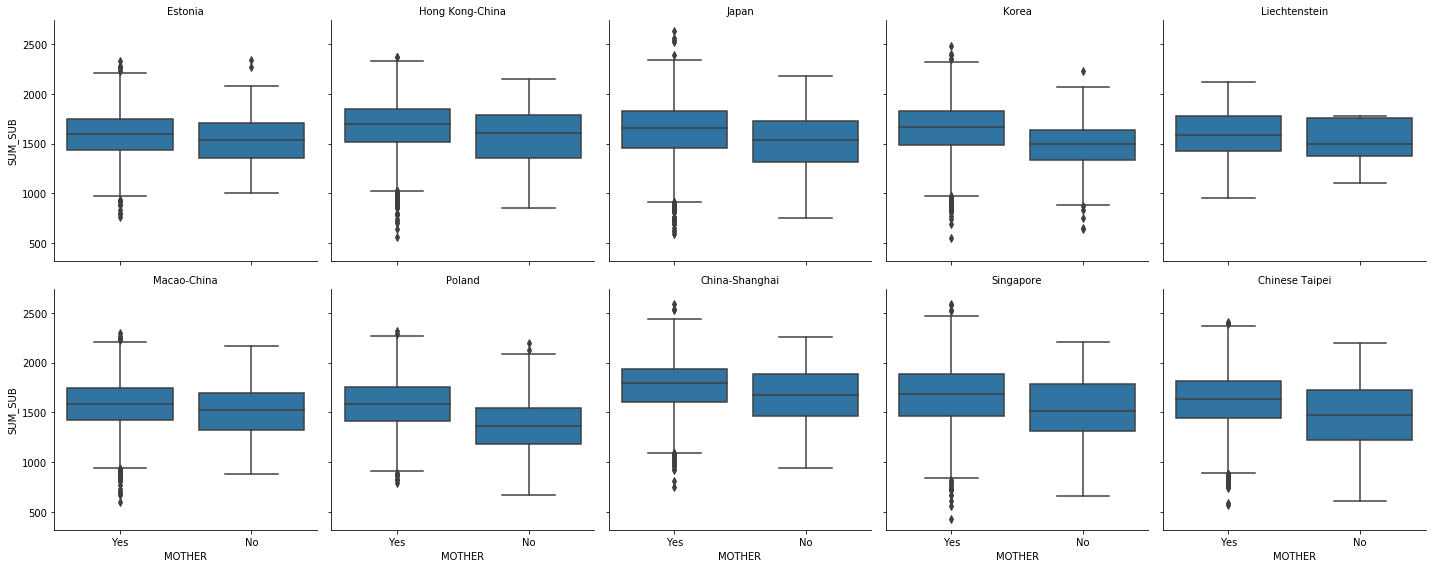

In [52]:
# mother at home vs total score of student for each country.

MOM = df3[df3["CNT"].isin(top.index)]
g1 = sb.FacetGrid(MOM, col ="CNT",col_wrap=5,size = 4)
g1.map(sb.boxplot, "MOTHER","SUM_SUB")
g1.set_titles(col_template = '{col_name}')


Here, This is the average total score in 3 subjects to mother at home factor in each country. This plots add more confidence to our previous conclusion that mother absence has effect in average on total student score.

C:\Users\Maraw\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


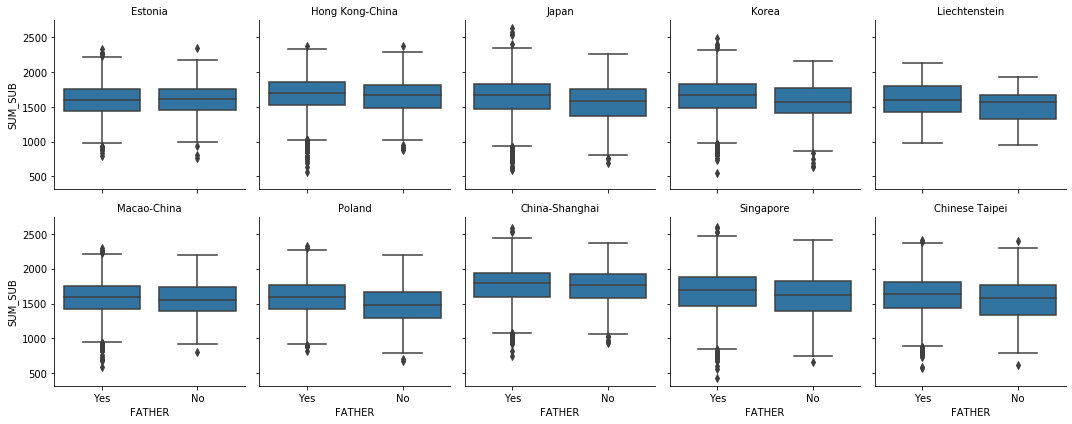

In [53]:
# father at home vs total score of student for each country.

DAD = df3[df3["CNT"].isin(top.index)]
g2 = sb.FacetGrid(DAD, col ="CNT",col_wrap=5)
g2.map(sb.boxplot, "FATHER","SUM_SUB")
g2.set_titles(col_template = "{col_name}")

And this one is similarbut to (father at-home). This plots add more confidence to our previous conclusion that father absence has effect in average (but less than mothers) on total student score(This doesn't mean fathers are less important they still have an effect).

In [54]:
# Ordering the troublesome column
df2['TROUBLESOME']=df2['TROUBLESOME'].astype(CategoricalDtype(categories=['Strongly agree','Agree','Disagree','Strongly disagree']))

C:\Users\Maraw\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Maraw\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(13.540833333333332, 0.5, 'Number of students')

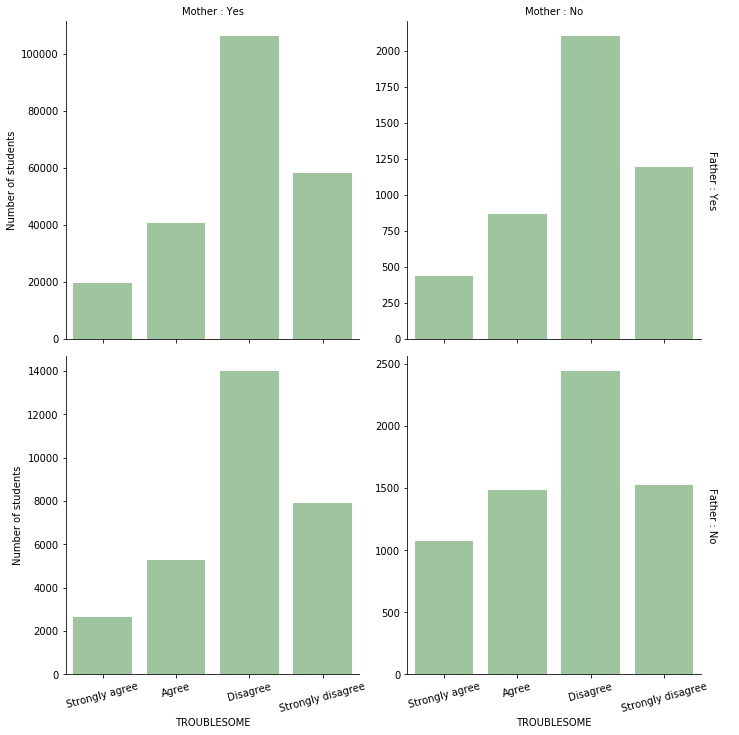

In [55]:
# The relation between father at home, mother at home and if the student is troublesome

df4 = df2[["TROUBLESOME", "MOTHER", "FATHER"]].dropna()
g4= sb.FacetGrid(df4, col= "MOTHER",row = "FATHER",sharey= False, margin_titles=True,size =5,hue_kws={"color":"green"})
g4.map(sb.countplot, "TROUBLESOME",alpha=.4).add_legend()
for ax in g4.axes.flat:
    plt.setp(ax.texts, text="")
    plt.setp(ax.get_xticklabels(),rotation = 15)
g4.set_titles(col_template = "Mother : {col_name}", row_template = "Father : {row_name}")
g4.axes[0,0].set_ylabel("Number of students")
g4.axes[1,0].set_ylabel("Number of students")

In this Last one,I turned off sharying y axis beacuase the size wasn't consistent in each plot. The difference We can see is that the students became more toublesome after the absence of both parents at home.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the mother factor and father factor,The plot strenghted the conclusion and that in every country the average of students who have parents at home are higher to the students who haven't. In the Teacher help plot, This one showed us that additional details to the previous one in bivariate. One of this deails is the score range shrinks if the student need less help from the math teacher.

### Were there any interesting or surprising interactions between features?

> One of the interesting conclusions is that the students become more toublesome when they don't have both parents at home.